# Challenger Nestlé 2021

# Planejamento da solução (IOT)

## Input

- Os competidores da batalha de dados da Nestlé terão que apresentar soluções inovadoras, com foco em dados para ajudar a desenvolver o mercado artesanal e independente de produção de bolos e doces.

## Output

- Ferramentas
    - Metabase
    - Streamit
- URL para o time de operação testar
- Download dos dados selecionados

## Tasks

- Descrição dos dados
    - Substituir nulos
- EDA
    - Análise Univariada
    - Análise bivariada
    - Detecção de outliers
    - Seleção de features
    - Estudo do Espaço
    - Definição do Embedding
- Treinamento de algorítimos de ML
    - Análise de performace
    - Análise de clustering
    - Definição dos números de clusters
- EDA Insights
    - Explicação das características dos segmentos
- Tabela para armazenar os clientes clusterizados
- Criação do notebook de produção
- Arquitetura AWS
    - S3 para armazenar dados
    - EC2 para armazenar o ETC e a ferramenta de visualização
    - DB para armazenar a tabela
    - Cronjob
    - Papermil
    

# 0 - Importações e funções

## Importações

In [1]:
import pandas as pd
from sklearn    import cluster as c
from sklearn    import metrics as m
from matplotlib import pyplot  as plt



## funções

In [2]:
# formatar numeros floats para não exibir notação cientifica. Usar 2 decimais
pd.options.display.float_format = '{:.2f}'.format

## Importar dados

In [3]:
tb_addresses = pd.read_csv("data/raw/tb_addresses.csv", sep=";", low_memory=False)
tb_banners = pd.read_csv("data/raw/tb_banners.csv", sep=";", low_memory=False)
tb_cities = pd.read_csv("data/raw/tb_cities.csv", sep=";", low_memory=False)
tb_coupons = pd.read_csv("data/raw/tb_coupons.csv", sep=";", low_memory=False)
tb_customer_payments = pd.read_csv("data/raw/tb_customer_payments.csv", sep=";", low_memory=False)
tb_ordered_products = pd.read_csv("data/raw/tb_ordered_products.csv", sep=";", low_memory=False)
tb_product_tags = pd.read_csv("data/raw/tb_product_tags.csv", sep=";", low_memory=False)
tb_products = pd.read_csv("data/raw/tb_products.csv", sep=";", low_memory=False)
tb_ratings = pd.read_csv("data/raw/tb_ratings.csv", sep=";", low_memory=False)
tb_solds_cognatis = pd.read_csv("data/raw/tb_solds_cognatis.csv", sep=";", low_memory=False)
tb_users = pd.read_csv("data/raw/tb_users.csv", sep=";", low_memory=False)
tb_vendor_payments = pd.read_csv("data/raw/tb_vendor_payments.csv", sep=";", low_memory=False)
tb_vendors = pd.read_csv("data/raw/tb_vendors.csv", sep=";", low_memory=False)
tb_vendors_delivery_fees = pd.read_csv("data/raw/tb_vendors_delivery_fees.csv", sep=";", low_memory=False)


- <b>tb_address</b>: Endereços dos fornecedores cadastrado na plataforma Vem de Bolo.
- <b>tb_banners</b>: Banners divulgados na plataforma Vem de Bolo.
- <b>tb_cities</b>: Cidades cadastradas e disponíveis na plataforma Vem de Bolo.
- <b>tb_coupons</b>: Cupons de descontos disponibilizados na plataforma Vem de Bolo.
- <b>tb_customer_payments</b>: Pagamentos dos clientes na plataforma Vem de Bolo.
- <b>tb_ordered_products</b>: Produtos vendidos na plataforma Vem de Bolo.
- <b>tb_product_tags</b>: Tags de produtos na plataforma Vem de Bolo.
- <b>tb_products</b>: Cadastrados na plataforma Vem de Bolo
- <b>tb_ratings</b>: Avaliações dos produtos na plataforma Vem de Bolo.
- <b>tb_solds_cognatis</b>: Tabela com dados de pesquisa de mercado para clientes Nestlé Brasil
- <b>tb_users</b>: Usuários cadastrados na plataforma Vem de Bolo.
- <b>tb_vendor_payments</b>: Pagamentos aos fornecedores cadastrados na plataforma Vem de Bolo.
- <b>tb_vendors</b>: Fornecedores cadastrados na plataforma Vem de Bolo
- <b>tb_vendors_delivery_fees</b>: Taxas de entregas na plataforma Vem de Bolo.


# 1 - Descrição dos dados

In [4]:
df01_Endereco = tb_addresses.copy()
df01_Banner = tb_banners.copy()
df01_Cidade = tb_cities.copy()
df01_Cupom = tb_coupons.copy()
df01_PgtoCliente = tb_customer_payments.copy()
df01_Pedido = tb_ordered_products.copy()
df01_Tag = tb_product_tags.copy()
df01_Produto = tb_products.copy()
df01_Avaliacao = tb_ratings.copy()
df01_Pesquisa = tb_solds_cognatis.copy()
df01_Usuario = tb_users.copy()
df01_PgtoFornecedor = tb_vendor_payments.copy()
df01_Fornecedor = tb_vendors.copy()
df01_TaxaEntrega = tb_vendors_delivery_fees.copy()


In [5]:
tabelas = ['tb_addresses','tb_banners','tb_cities','tb_coupons','tb_customer_payments','tb_ordered_products',
          'tb_product_tags','tb_products','tb_ratings','tb_solds_cognatis','tb_users','tb_vendor_payments',
          'tb_vendors','tb_vendors_delivery_fees']

## Renomear colunas

In [6]:
 # Deixa os nomes das colunas em minúsculo
df01_Endereco.columns = df01_Endereco.columns.str.lower()
df01_Banner.columns = df01_Banner.columns.str.lower()
df01_Cidade.columns = df01_Cidade.columns.str.lower()
df01_Cupom.columns = df01_Cupom.columns.str.lower()
df01_PgtoCliente.columns = df01_PgtoCliente.columns.str.lower()
df01_Pedido.columns = df01_Pedido.columns.str.lower()
df01_Tag.columns = df01_Tag.columns.str.lower()
df01_Produto.columns = df01_Produto.columns.str.lower()
df01_Avaliacao.columns = df01_Avaliacao.columns.str.lower()
df01_Pesquisa.columns = df01_Pesquisa.columns.str.lower()
df01_Usuario.columns = df01_Usuario.columns.str.lower()
df01_PgtoFornecedor.columns = df01_PgtoFornecedor.columns.str.lower()
df01_Fornecedor.columns = df01_Fornecedor.columns.str.lower()
df01_TaxaEntrega.columns = df01_TaxaEntrega.columns.str.lower()


## dimensão dos dados

In [7]:
dimensao = np.array([['tabela','linhas','colunas'],
           ['Endereço'      ,'{}'.format(df01_Endereco.shape[0])   ,'{}'.format(df01_Endereco.shape[1])],
           ['Banner'        ,'{}'.format(df01_Banner.shape[0])     ,'{}'.format(df01_Banner.shape[1])],
           ['Cidade'        ,'{}'.format(df01_Cidade.shape[0])     ,'{}'.format(df01_Cidade.shape[1])],
           ['Cupom'         ,'{}'.format(df01_Cupom.shape[0])      ,'{}'.format(df01_Cupom.shape[1])],
           ['PgtoCliente'   ,'{}'.format(df01_PgtoCliente.shape[0]),'{}'.format(df01_PgtoCliente.shape[1])],
           ['Pedido'        ,'{}'.format(df01_Pedido.shape[0])     ,'{}'.format(df01_Pedido.shape[1])],
           ['Tag'           ,'{}'.format(df01_Tag.shape[0])        ,'{}'.format(df01_Tag.shape[1])],
           ['Produto'       ,'{}'.format(df01_Produto.shape[0]),'{}'.format(df01_Produto.shape[1])],
           ['Avaliacao'     ,'{}'.format(df01_Avaliacao.shape[0]),'{}'.format(df01_Avaliacao.shape[1])],
           ['Pesquisa'      ,'{}'.format(df01_Pesquisa.shape[0]),'{}'.format(df01_Pesquisa.shape[1])],
           ['Usuario'       ,'{}'.format(df01_Usuario.shape[0]),'{}'.format(df01_Usuario.shape[1])],
           ['PgtoFornecedor','{}'.format(df01_PgtoFornecedor.shape[0]),'{}'.format(df01_PgtoFornecedor.shape[1])],
           ['Fornecedor'    ,'{}'.format(df01_Fornecedor.shape[0]),'{}'.format(df01_Fornecedor.shape[1])],
           ['TaxaEntrega'   ,'{}'.format(df01_TaxaEntrega.shape[0]),'{}'.format(df01_TaxaEntrega.shape[1])]])


In [8]:
df_dimensao = pd.DataFrame(dimensao)

In [9]:
df_dimensao

,0,1,2
0,tabela,linhas,colunas
1,Endereço,87217,10
2,Banner,10,7
3,Cidade,333,6
4,Cupom,604,20
5,PgtoCliente,8295,7
6,Pedido,15908,11
7,Tag,109,4
8,Produto,3177,12
9,Avaliacao,47224,9


In [12]:
df01_Pesquisa

,setor_ativ,uf,municipio,cep,trabalhadores,s_renda_media,s_fluxo_pedestre,s_fluxo_veiculos,s_pop_total,s_dom_part_perm,...,s_de_50_99_func,s_de_100_249_func,s_de_250_499_func,s_de_500_999_func,s_mais1000_func,s_supermercado,s_tt_padaria,s_atacado,s_hipermercado,s_minimercado
0,NaN,NaN,NaN,NaN,18776.60,1852.33,3.16,4.93,61660.28,22297.53,...,22.88,12.44,4.03,2.00,1.67,8.77,57.61,23.13,2.87,85.97
1,NaN,AC,Rio Branco,69900001.00,13125.00,3502.67,4.00,6.00,53376.00,17146.00,...,15.00,15.00,3.00,4.00,2.00,3.00,22.00,3.00,9.00,184.00
2,NaN,AC,Rio Branco,69900001.00,18364.00,2477.16,4.00,6.00,73460.00,24698.00,...,19.00,19.00,6.00,2.00,2.00,14.00,29.00,27.00,9.00,111.00
3,NaN,AC,Sena Madureira,NaN,960.00,1225.87,0.00,0.00,26675.50,7823.50,...,1.00,0.00,0.00,0.50,0.00,3.00,7.50,5.00,1.00,84.00
4,NaN,AC,Senador Guiomard,NaN,1102.00,1272.08,0.00,1.00,11183.00,3732.00,...,0.00,0.00,0.00,1.00,0.00,0.00,10.00,0.00,0.00,42.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82386,SERVICOS,TO,PARAISO DO TOCANTINS,77600000.00,3622.00,1266.87,1.33,3.33,19705.00,7031.00,...,3.33,3.33,0.33,0.67,0.00,22.33,13.00,23.33,4.33,43.33
82387,SERVICOS,TO,PAU D:ARCO,77785000.00,195.00,1397.07,0.00,0.00,3525.00,1190.00,...,0.00,1.00,0.00,0.00,0.00,7.00,1.00,0.00,0.00,9.00
82388,SERVICOS,TO,PEIXE,77460000.00,40.00,979.87,0.00,2.00,4767.00,1740.00,...,0.00,0.00,0.00,0.00,0.00,1.00,5.00,0.00,0.00,23.00
82389,SERVICOS,TO,PORTO NACIONAL,77500000.00,2123.50,1397.15,2.00,5.00,19474.50,6495.00,...,1.50,3.50,1.00,0.00,0.00,14.50,10.00,4.00,2.00,41.00


## Tipagens

In [13]:
df01_Pesquisa.dtypes

setor_ativ                    object
uf                            object
municipio                     object
cep                          float64
trabalhadores                float64
s_renda_media                float64
s_fluxo_pedestre             float64
s_fluxo_veiculos             float64
s_pop_total                  float64
s_dom_part_perm              float64
s_pct_criancas               float64
s_pct_adolescente            float64
s_pct_jovens                 float64
s_pct_adultos                float64
s_pct_senior                 float64
s_pct_idosos                 float64
s_renda_media_familiar       float64
s_densidade_populacao_km2    float64
s_pct_classe_a               float64
s_pct_classe_b               float64
s_pct_classe_c               float64
s_pct_classe_d               float64
s_pct_classe_e               float64
s_tx_cresc_pop               float64
s_tx_cresc_dom               float64
s_tx_cresc_renda_media       float64
s_renda_per_capita           float64
s

## Consultar / Tratar Nulos

In [14]:
df01_Pesquisa.isna().sum()

setor_ativ                   4833
uf                              1
municipio                       1
cep                          2039
trabalhadores                   0
s_renda_media                   0
s_fluxo_pedestre                0
s_fluxo_veiculos                0
s_pop_total                     0
s_dom_part_perm                 0
s_pct_criancas                  0
s_pct_adolescente               0
s_pct_jovens                    0
s_pct_adultos                   0
s_pct_senior                    0
s_pct_idosos                    0
s_renda_media_familiar          0
s_densidade_populacao_km2       0
s_pct_classe_a                  0
s_pct_classe_b                  0
s_pct_classe_c                  0
s_pct_classe_d                  0
s_pct_classe_e                  0
s_tx_cresc_pop                  0
s_tx_cresc_dom                  0
s_tx_cresc_renda_media          0
s_renda_per_capita              0
s_comercializacao               0
s_qtd_empresas                  0
s_pct_cnae_agr

In [15]:
# percentual de nulos
df01_Pesquisa.isna().sum() / df01_Pesquisa.shape[0]

setor_ativ                  0.06
uf                          0.00
municipio                   0.00
cep                         0.02
trabalhadores               0.00
s_renda_media               0.00
s_fluxo_pedestre            0.00
s_fluxo_veiculos            0.00
s_pop_total                 0.00
s_dom_part_perm             0.00
s_pct_criancas              0.00
s_pct_adolescente           0.00
s_pct_jovens                0.00
s_pct_adultos               0.00
s_pct_senior                0.00
s_pct_idosos                0.00
s_renda_media_familiar      0.00
s_densidade_populacao_km2   0.00
s_pct_classe_a              0.00
s_pct_classe_b              0.00
s_pct_classe_c              0.00
s_pct_classe_d              0.00
s_pct_classe_e              0.00
s_tx_cresc_pop              0.00
s_tx_cresc_dom              0.00
s_tx_cresc_renda_media      0.00
s_renda_per_capita          0.00
s_comercializacao           0.00
s_qtd_empresas              0.00
s_pct_cnae_agricola         0.00
s_pct_cnae

In [16]:
# primeiro ciclo do CRISP eliminar nulos
# avaliar = minimum_payments colocar zero e credit_limit colocar o valor máximo do dataset
df01_Pesquisa = df01_Pesquisa.dropna()

In [17]:
df01_Pesquisa.isna().sum()

setor_ativ                   0
uf                           0
municipio                    0
cep                          0
trabalhadores                0
s_renda_media                0
s_fluxo_pedestre             0
s_fluxo_veiculos             0
s_pop_total                  0
s_dom_part_perm              0
s_pct_criancas               0
s_pct_adolescente            0
s_pct_jovens                 0
s_pct_adultos                0
s_pct_senior                 0
s_pct_idosos                 0
s_renda_media_familiar       0
s_densidade_populacao_km2    0
s_pct_classe_a               0
s_pct_classe_b               0
s_pct_classe_c               0
s_pct_classe_d               0
s_pct_classe_e               0
s_tx_cresc_pop               0
s_tx_cresc_dom               0
s_tx_cresc_renda_media       0
s_renda_per_capita           0
s_comercializacao            0
s_qtd_empresas               0
s_pct_cnae_agricola          0
s_pct_cnae_comercio          0
s_pct_cnae_constr_civil      0
s_pct_cn

In [18]:
num_att = df01_Pesquisa.select_dtypes( include = ['int64','int32', 'float64'] )

In [21]:
# tendencia central - média e mediana
ct1 = pd.DataFrame (num_att.apply( np.mean ) ).T
ct2 = pd.DataFrame (num_att.apply( np.median ) ).T
# dispersão - desvio padrão, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_att.apply (np.std) ).T
d2 = pd.DataFrame(num_att.apply (min ) ).T
d3 = pd.DataFrame(num_att.apply (max ) ).T
d4 = pd.DataFrame(num_att.apply (lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame(num_att.apply (lambda x: x.skew() ) ).T
d6 = pd.DataFrame(num_att.apply (lambda x: x.kurtosis() ) ).T

# concatenar
m = pd.concat( [d2, d3, ct1, ct2, d1, d5, d6, d4] ).T.reset_index()
m.columns = ['Atributos', 'min', 'max','media','Mediana','desv.Padrao','Distorção','curtose','Range']

In [22]:
m

,Atributos,min,max,media,Mediana,desv.Padrao,Distorção,curtose,Range
0,cep,11000001.00,99990000.00,54560433.30,58000001.00,26989210.11,-0.05,-1.29,88989999.00
1,trabalhadores,0.00,450359.00,14356.29,6041.00,29486.81,6.04,48.92,450359.00
2,s_renda_media,0.00,30685.60,1793.98,1608.73,808.22,3.85,53.45,30685.60
3,s_fluxo_pedestre,0.00,5.00,2.95,3.00,1.51,-0.56,-0.63,5.00
4,s_fluxo_veiculos,0.00,6.00,4.83,5.00,1.62,-1.92,2.98,6.00
5,s_pop_total,0.00,286481.50,52394.60,43903.00,39135.06,1.18,1.60,286481.50
6,s_dom_part_perm,0.00,118235.00,18756.93,15450.50,14645.29,1.44,3.13,118235.00
7,s_pct_criancas,0.00,60.35,12.34,12.33,2.80,0.34,3.05,60.35
8,s_pct_adolescente,0.00,33.33,13.41,13.44,2.53,0.15,0.68,33.33
9,s_pct_jovens,0.00,66.66,16.12,16.01,1.84,1.01,16.11,66.66


# 2 - Filtragem de dados

# 3 - Feature Engineering (Atributos de engenharia)

# 4 - EDA - Estudo do espaço

# 5 - Preparação dos dados

# 6 -Seleção de atributos

In [33]:
cols_drop = ['cust_id']
X = df01.drop(cols_drop, axis=1)

In [34]:
X.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


# 7 - Hiperparametrização

## k-Means

In [52]:
clusters = [2,3,4,5,6,7,8]
sil_list = []
dav_list = []
for k in clusters:
    # definição 
    kmeans_model = c.KMeans(n_clusters=k)
    
    # Treino
    kmeans_model.fit(X)
    # predicao
    labels = kmeans_model.predict(X)
    
    # performance
    sil = m.silhouette_score (X, labels)
    dav = m.davies_bouldin_score (X, labels)
    sil_list.append(sil)
    dav_list.append(dav)
    
    

In [53]:
print (sil_list)

[0.511307699456009, 0.4646850533802915, 0.39455248283883604, 0.393922125414492, 0.37176478006363256, 0.36967886011048107, 0.383018408050653]


In [54]:
print(dav_list)

[1.244923304166786, 1.1960522364790755, 1.4035118183442097, 1.1702875411637432, 1.2445538659277904, 1.1193392674389806, 1.1005740803576116]


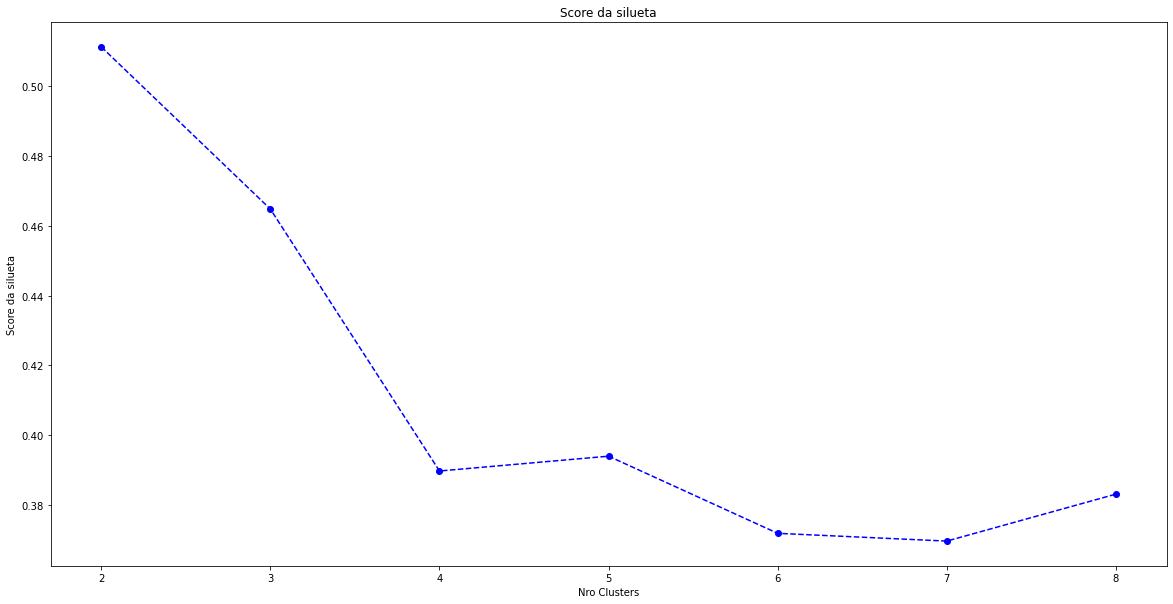

In [49]:
plt.figure(figsize=[20,10])
plt.plot(clusters, sil_list, linestyle = '--', marker = 'o', color = 'b')
plt.xlabel('Nro Clusters');
plt.ylabel('Score da silueta');
plt.title('Score da silueta');

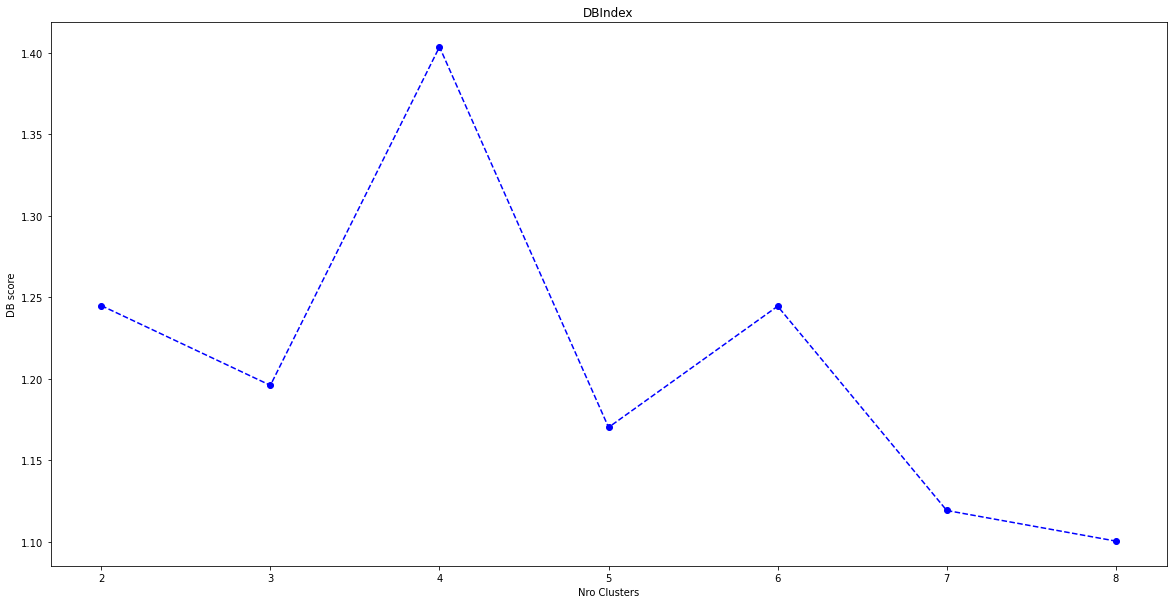

In [56]:
plt.figure(figsize=[20,10])
plt.plot(clusters, dav_list, linestyle = '--', marker = 'o', color = 'b')
plt.xlabel('Nro Clusters');
plt.ylabel('DB score');
plt.title('DBIndex');

# 8 - Treinamento dos algorítimos

# 9 - Análise de clusters

# 10 - EDA - Descoberta de relatórios - Insights

# 11 - Deploy para produção